In [824]:
%run "NPGMI Update.ipynb"

from time import time

In [825]:
POLY_DATA = np.genfromtxt("NPGMI-Library/Simulations and Plots/2PGMI PhysRevA/poly_contrast_data.csv", delimiter = ",").T
POLY_DATA[0] *= 1e3
MONO_DATA = np.genfromtxt("NPGMI-Library/Simulations and Plots/2PGMI PhysRevA/mono_contrast_data.csv", delimiter = ",").T


In [826]:
p = 2.4e-6
L1mono = 1.2
# L1bi = 1.73
L1poly = 4.65

# L0mono = -0.05
L0mono = 0

# L0bi = 0.01
L0poly = 0.44
# d0 = {"mono": -0.75e-3, "bi": +0.8e-3, "poly": -0.38e-3}
d0 = {"mono": 0, "bi":0, "poly": 0}


Lmono = 2.99 - L0mono
# Lbi = 3.52 - L0bi
Lpoly = 8.8 - L0poly


polyspectrum = pd.read_excel("ng6_MCNP_spectrum.xlsx").to_numpy().T
polyspectrum[0]*=1e-9

lammono = np.array([4.4e-10])
plammono = np.array([1])

# lambi = np.array([4.4e-10,2.2e-10])
# plambi = np.array([3.2/4.2,1/4.2])

lampoly, plampoly = polyspectrum.copy()


mt = 5

Nbc = 5e28*4.149e-15
h = 0.27*np.pi / (Nbc*4.4e-10)
hpoly = 0.2*np.pi / (Nbc*5e-10)

phimono = Nbc*lammono*h

# phibi = Nbc*lambi*h

phipoly = Nbc*lampoly*hpoly


camsize = 2.5e-2
slitx = 230e-6
# slitxrange = np.linspace(180,300,13)*1e-6
slitxpoly = 590e-6


slity = 100e-6
xbin = 1e-6
ybin = 1e-6
resx = resy = 100e-6
respoly = 150e-6


G1sdmono = {"p":p, "L1": np.array([L1mono]), "phi":phimono, "spectrum_spacing":1, "mt":mt}
G1sdmono["L2"] = np.linspace(7,16,26)*1e-3 


G2sdmono = {"p":p, "L1": G1sdmono["L1"] +  G1sdmono["L2"], "phi":phimono, "spectrum_spacing":1, "mt":mt}
G2sdmono["L2"] = Lmono - (G1sdmono["L1"] + G1sdmono["L2"])

# G1sdbi = {"p":p, "L1": np.array([L1bi]), "phi":phibi}
# G1sdbi["L2"] = np.linspace(7,16,10)*1e-3 + d0["bi"]


# G2sdbi = {"p":p, "L1": G1sdbi["L1"] +  G1sdbi["L2"], "phi":phibi}
# G2sdbi["L2"] = Lbi - (G1sdbi["L1"] + G1sdbi["L2"])


G1sdpoly = {"p":p, "L1": np.array([L1poly]), "phi":phipoly, "spectrum_spacing":1, "mt":mt}
G1sdpoly["L2"] = np.linspace(7,16,12)*1e-3 


G2sdpoly = {"p":p, "L1": G1sdpoly["L1"] +  G1sdpoly["L2"], "phi":phipoly, "spectrum_spacing":1, "mt":mt}
G2sdpoly["L2"] = Lpoly - (G1sdpoly["L1"] + G1sdpoly["L2"])


simaptsmono = {"G1":RectGrating(G1sdmono),"G2":RectGrating(G2sdmono)}
siminitmono = {"lam":lammono, "plam": plammono, "sum_lam":False, "L":Lmono,"d":G1sdmono["L2"],"mt":mt, "xbin":xbin,"ybin":ybin,\
           "camsize" : camsize ,"convmode" : "valid", "slitx": slitx, "slity" : slity, "resx": resx, "resy": resy}

# simaptsbi = {"G1":RectGrating(G1sdbi),"G2":RectGrating(G2sdbi)}
# siminitbi = {"lam":lambi, "plam": plambi, "L":Lbi,"d":G1sdbi["L2"],"mt":mt, "x": np.linspace(0,camsize,int(camsize/xbin)),"x0" : x0,"xbin":xbin,"ybin":ybin,\
#            "pos":np.array([[0],[1]]) ,"camsize" : camsize ,"convmode" : "valid", "slitx": slitx, "slity" : slity, "res": res, "batches" : 1000}

simaptspoly = {"G1":RectGrating(G1sdpoly),"G2":RectGrating(G2sdpoly)}
siminitpoly = {"lam":lampoly, "plam": plampoly, "sum_lam":True, "L":Lpoly,"d":G1sdpoly["L2"],"mt":mt, "xbin":xbin,"ybin":ybin,\
           "camsize" : camsize ,"convmode" : "valid", "slitx": slitxpoly, "slity" : slity, "resx": respoly, "resy": resy}

In [827]:
t0 = time()

simup = PGMI(simaptspoly, siminitpoly)

simup.propagate_to("G1")
simup.propagate_to("G2")
simup.generate_after("G2")



print(time() - t0, "seconds")

[  1   2   3   4   5   7   8   9  10  12  13  14  15  16  18  19  20  21
  23  24  25  26  27  29  30  31  32  34  35  36  37  38  40  41  42  43
  45  46  47  48  49  51  52  53  54  67  68  69  70  71  73  74  75  76
  78  79  80  81  82  84  85  86  87  89  90  91  92  93  95  96  97  98
 100 101 102 103 104 106 107 108 109 111 112 113 114 115 117 118 119 120
   0  11  22  33  44  66  77  88  99 110]
(12, 41, 121)
(12, 41)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120]
(12, 41, 121)
(12, 41)
0.030009984970092773 seconds


In [783]:

p = 2.4e-6
L = 8.8

lam = np.array([5e-10])
plam = np.array([1])

polyspectrum = pd.read_excel("ng6_MCNP_spectrum.xlsx").to_numpy().T
polyspectrum[0]*=1e-9

lam,plam = polyspectrum.copy()

x0 = np.array([0])


mt = 5


Nbc = 5e28*4.149e-15
h1,h2,h3 = 15.8e-6,29e-6,15.8e-6
# h1,h2,h3 = np.array([np.pi/2])/(Nbc*lam[np.argmax(plam)]),np.array([np.pi])/(Nbc*lam[np.argmax(plam)]),np.array([np.pi/2])/(Nbc*lam[np.argmax(plam)])

phi1,phi2,phi3 = Nbc*lam*h1,Nbc*lam*h2,Nbc*lam*h3

idealgrating_phase_offset = -413*np.pi/440


camsize = 2.5e-2
slitx = 500e-6
slity = 100e-6

xbin = 1e-6
ybin = 5e-6

res = 150e-6
d1 = np.array([4.6e-2])
slittoG2 = 4.75
d3pgmi = np.linspace(2,7,100)*1e-2


G1sd = {"p":p, "L1": np.array([slittoG2 - d1]), "phi":phi1, "phase_offset": idealgrating_phase_offset, "mt":mt, "spectrum_spacing":1}
G1sd["L2"] = d1

G2sd = {"p":p, "L1": G1sd["L2"] + G1sd["L1"], "phi":phi2, "phase_offset": idealgrating_phase_offset, "mt":mt, "spectrum_spacing":1}



G2sd["L2"] = d3pgmi 


G3sd = {"p":p, "L1": G2sd["L2"] + G2sd["L1"], "phi":phi3, "phase_offset": idealgrating_phase_offset, "mt":mt, "spectrum_spacing":1}
G3sd["L2"] = np.array([L]) - G3sd["L1"]

simaptsideal = {"G1":RectGrating(G1sd),"G2":RectGrating(G2sd),"G3":RectGrating(G3sd)}

# simaptsideal = {"G1":RectGrating(G1sd),"G2":Sample(G2sd,10*p,grating_equation(np.linspace(0,10*p,1001),p,0)),"G3":RectGrating(G3sd)}


# simaptsrect = {"G1":GratingFromImage(G1sd, rsize, rprofile),\
#                       "G2":GratingFromImage(G2sd,rsize,rprofile),\
#            "G3":GratingFromImage(G3sd,rsize, rprofile)}



# simaptsbb = {"G1":GratingFromImage(G1sd, rsize, rprofile),\
#                       "G2":Sample(G2sd,bbsize,np.array(rotbbprofiles)),\
#            "G3":GratingFromImage(G3sd,rsize, rprofile)}







siminit = {"lam":lam, "plam":plam, "sum_lam":True, "L":L,"d":d3pgmi-d1,"mt":mt, "x0" : x0,"xbin":xbin,"ybin":ybin,\
           "slitx": slitx,"slity" : slity, "resx": res, "resy":res  }

In [784]:
t0 = time()


simup = PGMI(simaptsideal, siminit)
simup.propagate_to("G1")
simup.propagate_to("G2")

simup.propagate_to("G3")

simup.generate_after("G3")

print(time() - t0, "seconds")

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
print([8]*2)

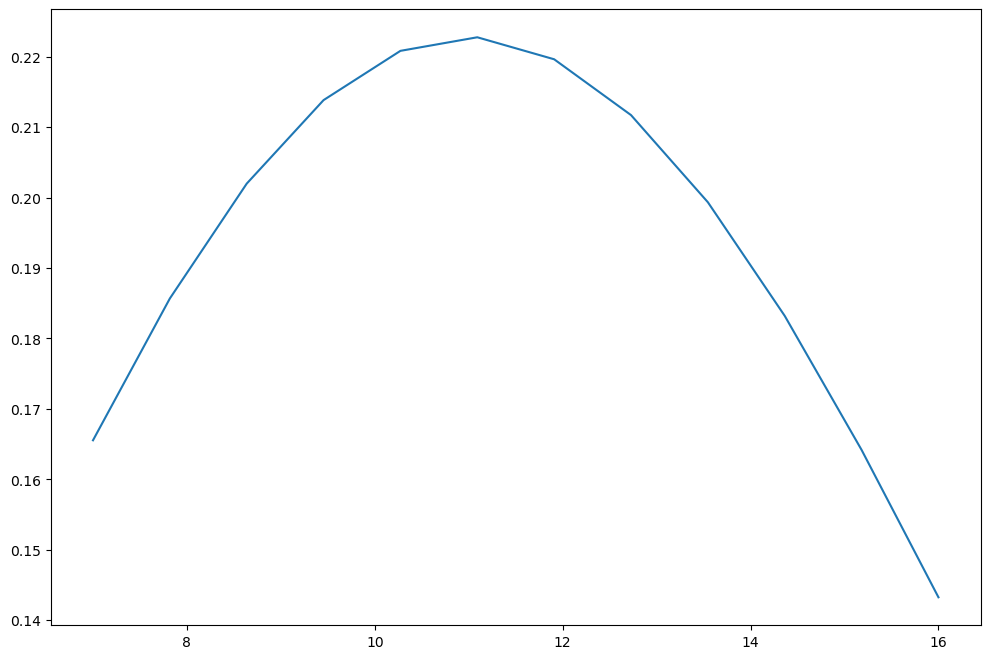

In [828]:
fig, ax1 = plt.subplots(figsize = (12,8))

ax1.plot(simup.d*1e3, simup.contrast)

plt.show()
plt.close(fig)


In [825]:
POLY_DATA = np.genfromtxt("NPGMI-Library/Simulations and Plots/2PGMI PhysRevA/poly_contrast_data.csv", delimiter = ",").T
POLY_DATA[0] *= 1e3
MONO_DATA = np.genfromtxt("NPGMI-Library/Simulations and Plots/2PGMI PhysRevA/mono_contrast_data.csv", delimiter = ",").T
